
Volatility measures the degree of variation in asset prices over time. 
In finance, it represents uncertainty or risk: higher volatility = larger potential price swings. 
For USO (which tracks crude oil futures), volatility reflects energy market uncertainty, geopolitical risk, and liquidity during trading hours.



FORMS OF VOL

* instantaneous vol -> variance of log returns per unit time
* realized vol --> square root of intrada squared returns
* Rolling vol --> time varying std deviation ove a moving window
* Implied volatiltiy --> expected future vol from options prices

OUR TARGET VARIABLE???

MULTI HORIZON REALIZED VARIANCE below

$RV_{t}^{(H)} = \sum_{k=1}^{H}r^{2}_{t+k} 
$

$H =$ horizon in minutes

$r_{t+k} =$ future returns after time t

$RV_{t}^{(5)} = $ realized variannce over next 5 minute

$RV_{9:30}^{5} = r_{9:31}^{2} + r_{9:32}^{2} + r_{9:33}^{2} + r_{9:34}^{2} + r_{9:35}^{2}$ 

we can obtain volatility from the following 

* $\sigma_{t}^{(H)} = \sqrt{\sum_{k=1}^{H}r^{2}_{t+k}}$


the model will learn how much price variability is likely to occur in the next H minutes, a forward looking vol signal.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data1.csv',index_col = "timestamp")

In [2]:

horizons = [5, 10, 15, 20, 30, 60]


realized_vols_rolling = pd.DataFrame(index=df.index)

df['squared_return'] = df['return']**2


for h in horizons:

    sum_of_squares = df['squared_return'].rolling(h).sum()
    realized_vols_rolling[f'RVOL_{h}m'] =  np.sqrt(sum_of_squares)


In [3]:
realized_vols_rolling

,RVOL_5m,RVOL_10m,RVOL_15m,RVOL_20m,RVOL_30m,RVOL_60m
timestamp,,,,,,
2023-01-03 09:30:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 09:31:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 09:32:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 09:33:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 09:34:00-05:00,0.004338,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-12-31 15:56:00-05:00,0.000199,0.000452,0.000631,0.000668,0.000907,0.001204
2024-12-31 15:57:00-05:00,0.000303,0.000524,0.000631,0.000716,0.000885,0.001226
2024-12-31 15:58:00-05:00,0.000449,0.000617,0.000662,0.000789,0.000924,0.001206


In [4]:
trading_days = 250
trading_minutes = 390

periods_per_year = trading_days * trading_minutes

annualization_factors = {h: np.sqrt(periods_per_year / h) for h in horizons}


annualized_rolling_rv = pd.DataFrame(index=df.index)

for h in horizons:
    annualized_rolling_rv[f'RVOL_{h}m annualized'] = realized_vols_rolling[f'RVOL_{h}m'] * annualization_factors[h]





In [5]:
annualized_rolling_rv

,RVOL_5m annualized,RVOL_10m annualized,RVOL_15m annualized,RVOL_20m annualized,RVOL_30m annualized,RVOL_60m annualized
timestamp,,,,,,
2023-01-03 09:30:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 09:31:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 09:32:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 09:33:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 09:34:00-05:00,0.605768,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-12-31 15:56:00-05:00,0.027734,0.044634,0.050894,0.046664,0.051719,0.048535
2024-12-31 15:57:00-05:00,0.042369,0.051731,0.050896,0.049981,0.050471,0.049408
2024-12-31 15:58:00-05:00,0.062707,0.060910,0.053357,0.055067,0.052684,0.048613


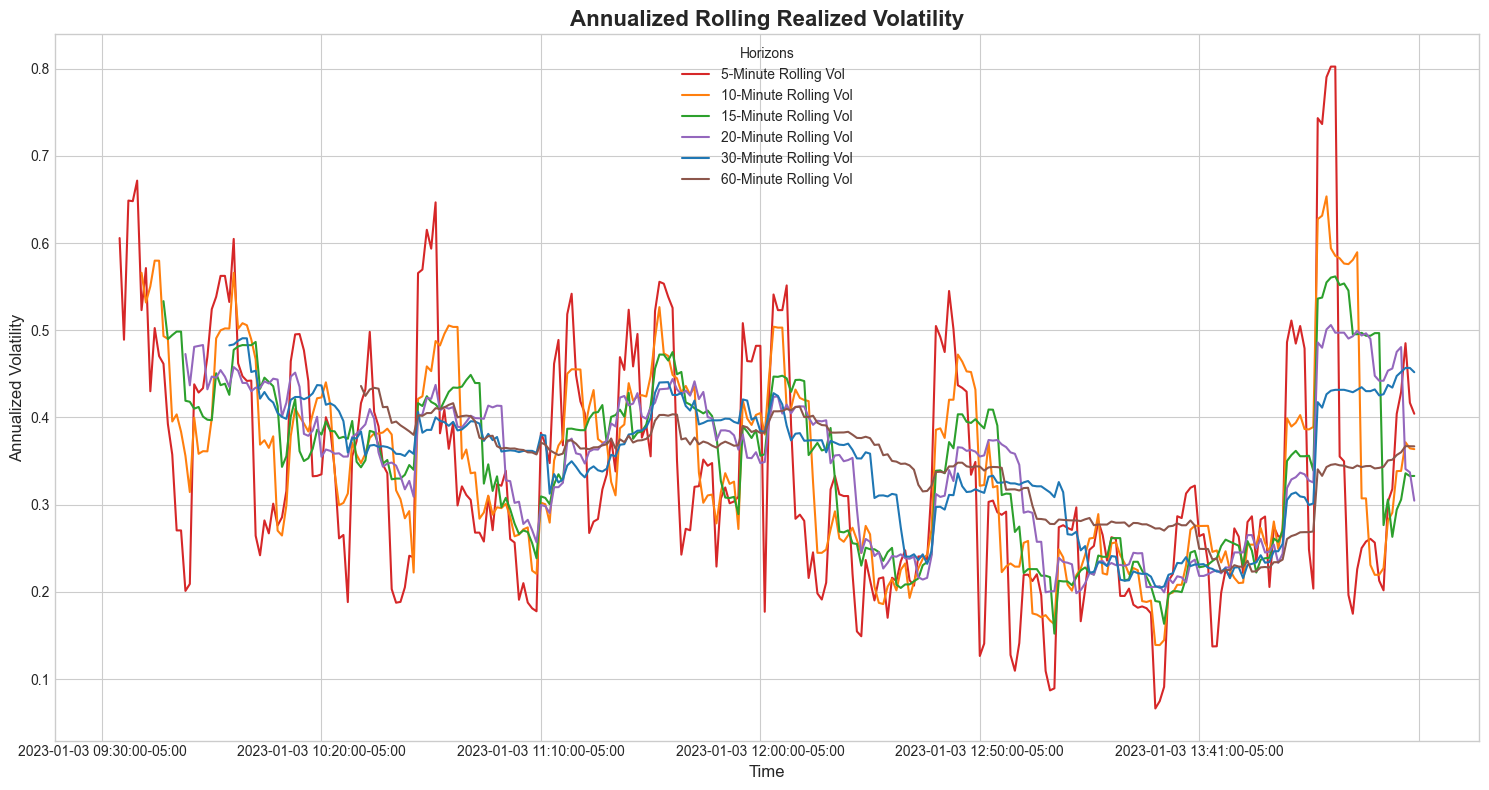

In [6]:
colors = ['#d62728', '#ff7f0e', '#2ca02c', '#9467bd', '#1f77b4', '#8c564b']

plt.style.use('seaborn-v0_8-whitegrid')
    
fig, ax = plt.subplots(figsize=(15, 8))

for i, h in enumerate(horizons):
    annualized_rolling_rv[f'RVOL_{h}m annualized'][:300].plot(
        ax=ax,
        label=f'{h}-Minute Rolling Vol',
        color=colors[i % len(colors)],  # Cycle through colors if more horizons than colors
        linewidth=1.5
    )

# --- 5. Customize and Save the Plot ---
ax.set_title('Annualized Rolling Realized Volatility', fontsize=16, fontweight='bold')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Annualized Volatility', fontsize=12)
ax.legend(title='Horizons')

# Ensure the layout is tight
plt.tight_layout()

plt.show()

This is why your plots of rolling volatility are not flat lines. They spike up and down throughout the day. A reading of 0.8 would be one of the sharp peaks on your graph, representing a moment of intense market activity. Your different horizons (5m vs. 60m) will capture these spikes with different sensitivities, but they will all react to the same underlying events.

* An annualized rolling RV of 0.8 doesn't predict the volatility for the next year. Instead, it tells you the current character of the market. It's an extrapolation of the immediate past.

    * At 1:50 pm, the RVOL_5m is 0.8: This means the price swings between 10:00 AM and 10:05 AM were so large that if they kept up for a year, the annual volatility would be 80%.

In [7]:
annualized_rolling_rv.std()

RVOL_5m annualized     0.118027
RVOL_10m annualized    0.107387
RVOL_15m annualized    0.102323
RVOL_20m annualized    0.098976
RVOL_30m annualized    0.094325
RVOL_60m annualized    0.085449
dtype: float64

Key Reasons for Higher Volatility in 5-Minute RV
1. Market Microstructure Noise
This is the most significant factor. Over very short intervals, the price of an ETF doesn't move in a smooth, continuous line. Instead, its movement is dominated by "noise" from the mechanics of trading itself:

Bid-Ask Bounce: The price constantly jumps between the bid (the highest price a buyer will pay) and the ask (the lowest price a seller will accept). A trade at the ask price followed by a trade at the bid price creates a negative return, even if the asset's true value hasn't changed. Over a 5-minute window, these bounces create significant artificial volatility.

Discrete Price Ticks: Prices can only move in discrete steps (e.g., one cent). These small, jerky movements add up to create apparent volatility that isn't necessarily a true reflection of risk.

Order Book Dynamics: The arrival of large buy or sell orders can temporarily push the price, causing sharp but short-lived price swings.

Over a longer period, like 60 minutes, these noisy effects tend to cancel each other out, revealing the more genuine price trend.

2. Fewer Data Points, Higher Impact
A rolling 5-minute window contains far fewer data points (e.g., 5 one-minute returns) than a 60-minute window. Because of this:

Outliers Have More Influence: A single large, abnormal return within a 5-minute window will have a much greater mathematical impact on the final calculation than it would in a 60-minute window, where its effect is diluted by 59 other data points.

Averaging Effect: Longer horizons inherently average out the highs and lows. The 60-minute calculation is a smoother, rolling average that is less susceptible to being skewed by brief spikes in activity.

Analogy: Driving a Car
Think of it like tracking the speed of a car.

5-Minute Volatility is like looking at the speedometer every single second. You'll see it jump up and down constantly as the driver makes tiny adjustments to the gas pedal and brake. The reading is highly erratic.

60-Minute Volatility is like calculating the car's average speed over each mile. This gives you a much smoother and more meaningful measure of how fast the car is actually traveling, ignoring the tiny, second-by-second fluctuations.

In conclusion, while the 5-minute realized volatility gives you a high-resolution, granular look at market activity, it's often too noisy to be a stable measure of an asset's true underlying risk. The longer-term measures provide a clearer, more reliable signal by filtering out this high-frequency noise.

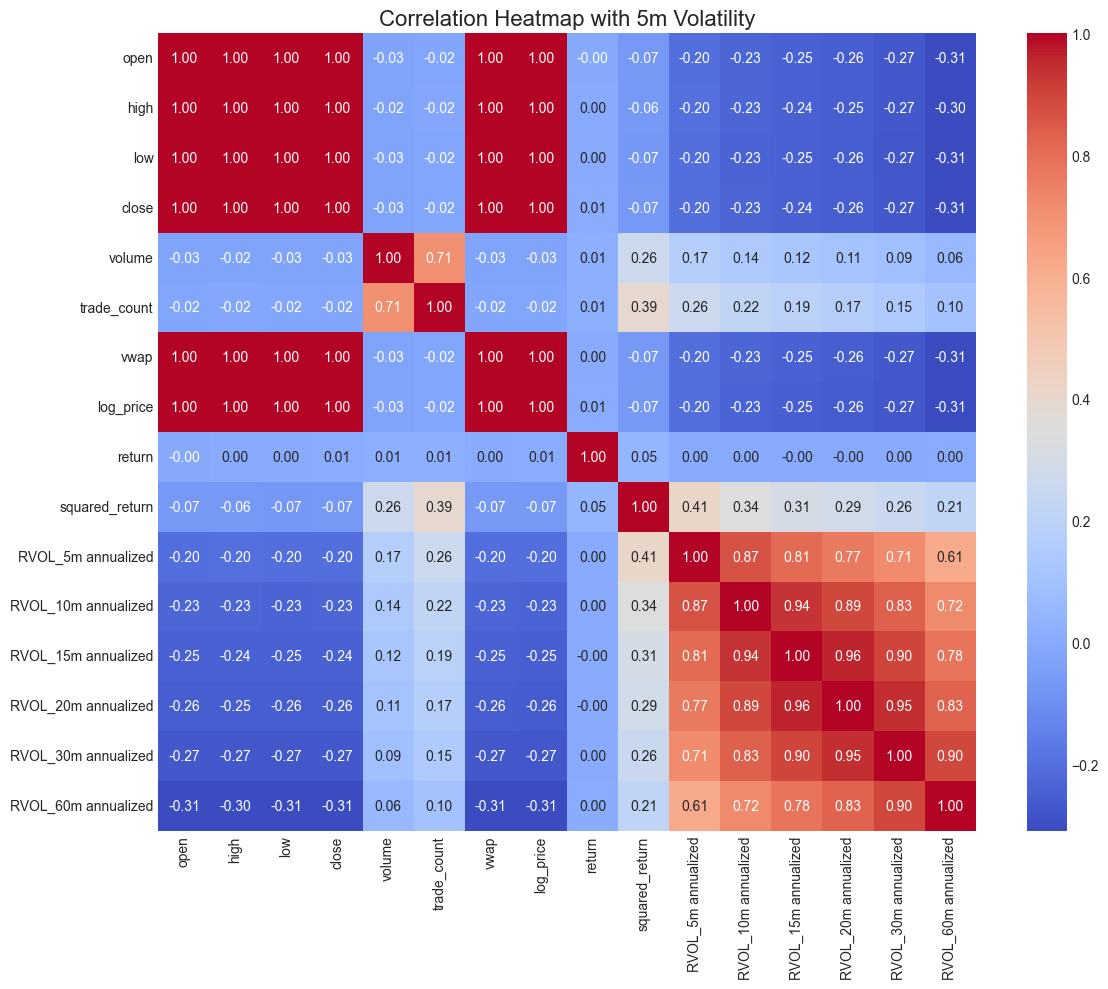

In [8]:
import seaborn as sns

analysis_df = df.join(annualized_rolling_rv, how='left')

correlation_matrix= analysis_df.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,      # Show the numbers in the cells
    cmap='coolwarm', # Use a blue-to-red color scheme
    fmt=".2f",       # Format numbers to two decimal places
    ax=ax
)
ax.set_title(f'Correlation Heatmap with {5}m Volatility', fontsize=16)
plt.tight_layout()
plt.show()


key findings

- bottom right block shows extremly high correlation between different horizons. confirming our calculations are measuring the same underlying pheneoma
- as seen in eda time and vol have a significant correlation. higher at open and close

* Investigate Non-Linearity: The low correlation between return and volatility is common. The relationship is often not a straight line. For example, large negative returns often cause a greater volatility spike than large positive returns (the "leverage effect"). You could investigate this by creating separate correlations for positive and negative return periods.

to explore this relationship further we look at the lagged values of our variables and look at the correlation with annualized realized vol

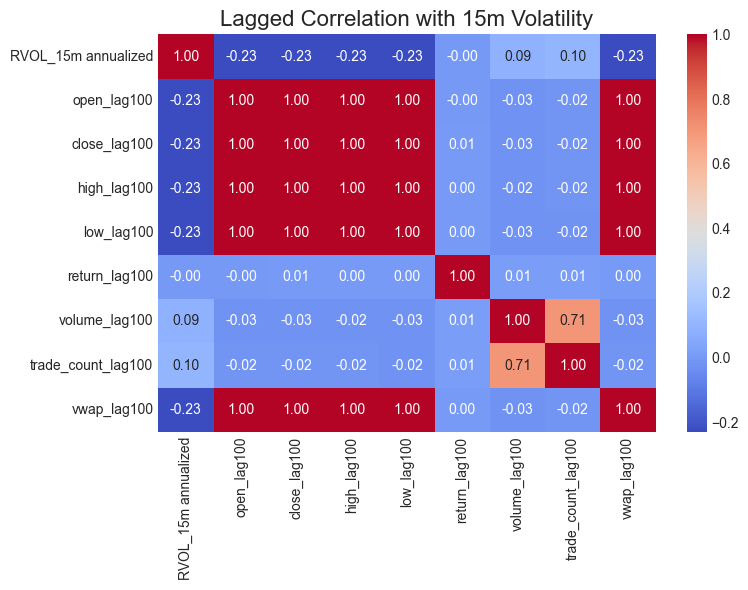

In [9]:
cols_to_lag = ['open','close', 'high', 'low', 'return', 'volume', 'trade_count', 'vwap']

lag_period = 100

lag_df = analysis_df.copy()

for col in cols_to_lag:
    lag_df[f'{col}_lag{lag_period}'] = lag_df[col].shift(lag_period)


cols_for_analysis = [f'RVOL_{15}m annualized'] + [f'{col}_lag{lag_period}' for col in cols_to_lag]


df_lagged = lag_df[cols_for_analysis].dropna()

lagged_correlation = df_lagged.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    lagged_correlation,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    ax=ax
)
ax.set_title(f'Lagged Correlation with {15}m Volatility', fontsize=16)
plt.tight_layout()
plt.show()


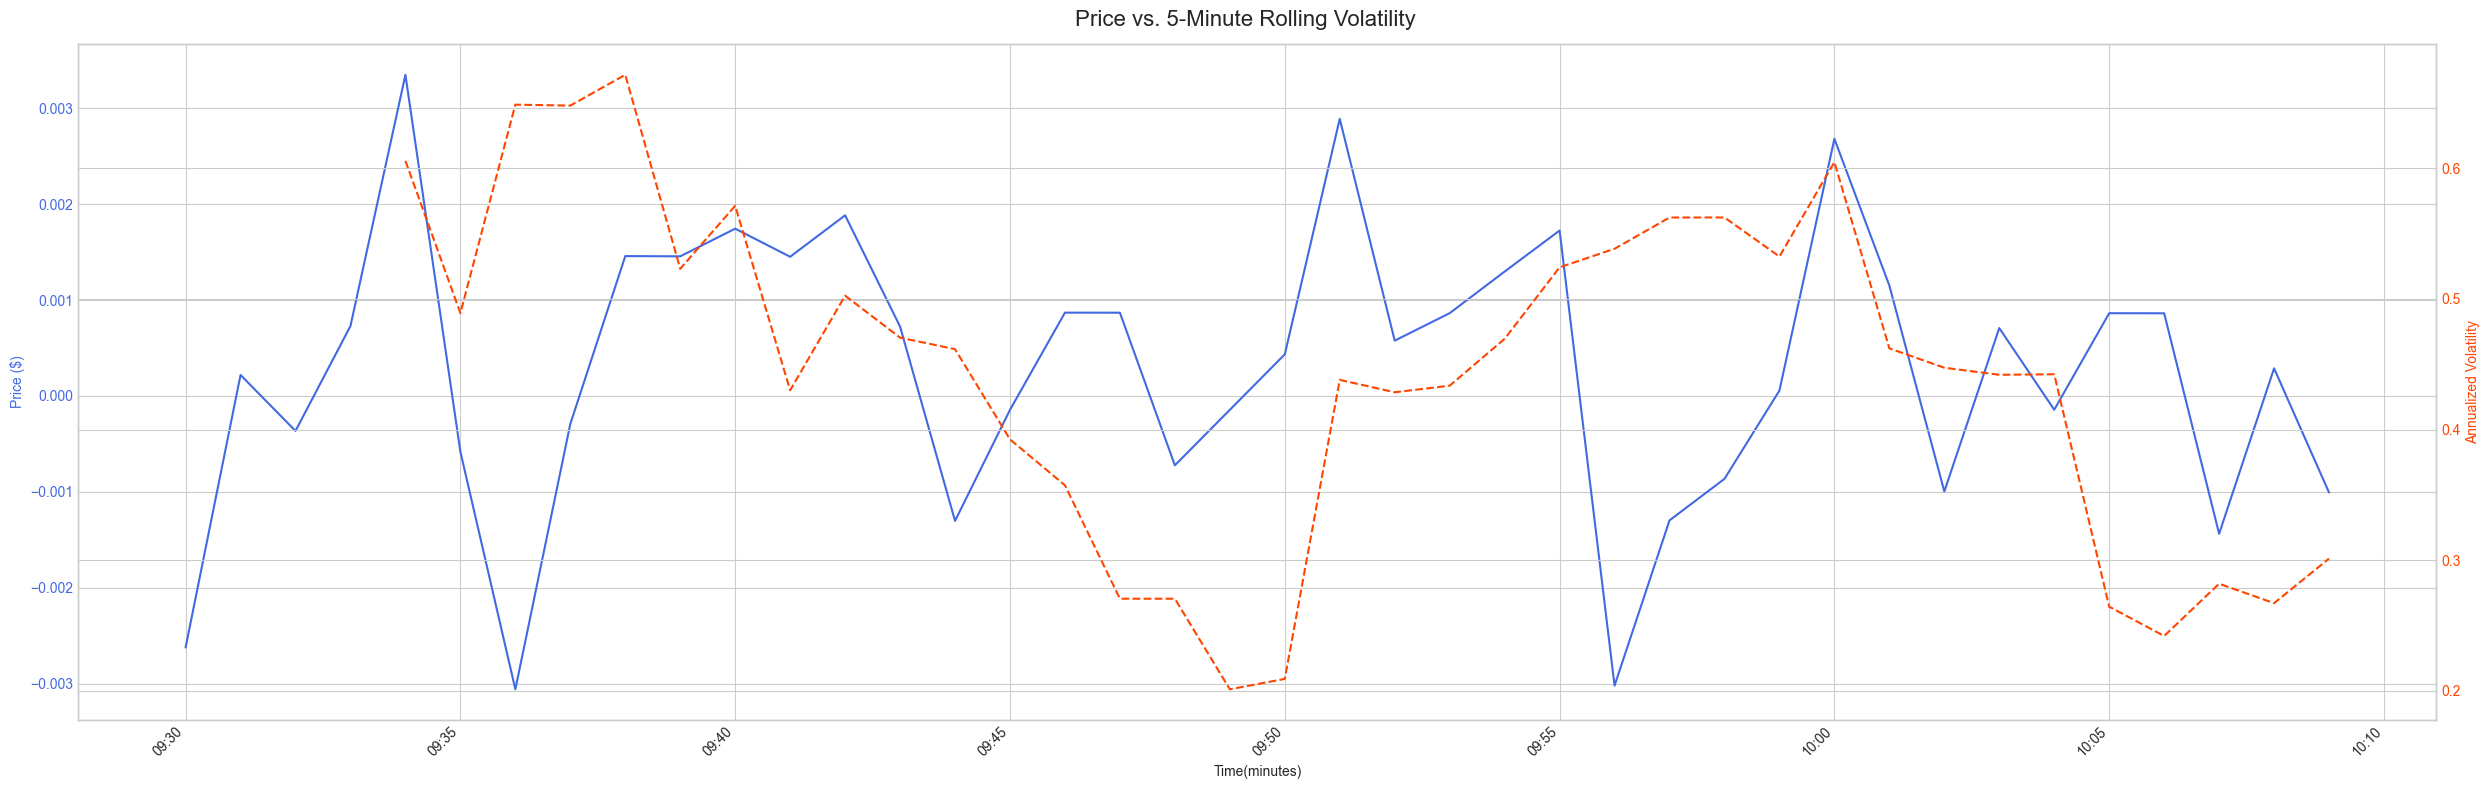

In [14]:
fig, ax1 = plt.subplots(figsize=(25, 8))

import matplotlib.dates as mdates



analysis_df_small = analysis_df[0:40].copy()

analysis_df_small.index = pd.to_datetime(analysis_df_small.index, utc=True)

analysis_df_small.index = analysis_df_small.index.tz_convert('America/New_York').tz_localize(None)

horizon = 5

# Plot Price on the first (left) y-axis
ax1.plot(analysis_df_small.index, analysis_df_small['return'], color='royalblue', label='Price')
ax1.set_xlabel('Time(minutes)')
ax1.set_ylabel('Price ($)', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

# Create the second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot Volatility on the second (right) y-axis
ax2.plot(analysis_df_small.index, analysis_df_small[f'RVOL_{horizon}m annualized'], color='orangered', label=f'{horizon}m Volatility', linestyle='--')
ax2.set_ylabel('Annualized Volatility', color='orangered')
ax2.tick_params(axis='y', labelcolor='orangered')

# --- 3. Final Touches ---
fig.suptitle(f'Price vs. {horizon}-Minute Rolling Volatility', fontsize=16)
locator = mdates.MinuteLocator(byminute=range(0, 60, horizon), interval=1)
ax1.xaxis.set_major_locator(locator)

formatter = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(formatter)

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

fig.tight_layout()
plt.show()   

it would be irrational to take Mondays vol calculation at 4:00pm and use that with no consideration for any overnight action for Tuesdays 9:30am rolling vol

* we need a way to account for the overnight price action. maybe just the overnight variance i.e $\ln({\frac{P_{t}}{P_{t-1}}})$
    * we would need to account for holidays and weekends here 
    * simply predicting tomorrows vol using a seperate model could work but if truly easy and possible we would be billionares
        * we can incorporate this calc into our first 5 min rolling vol calc

Model A: The "Opening Volatility" Model
This model's only job is to forecast volatility for the first 30-60 minutes of the day. It uses the feature engineering approach described above, heavily relying on the overnight return and Monday's end-of-day stats to predict the initial burst of volatility.

Model B: The "Intraday Continuation" Model
After the market "settles" (e.g., after 10:00 AM), you switch to a simpler model. This model ignores the overnight gap and just uses the most recent intraday rolling volatilities as predictors (e.g., vol at 10:05 AM is predicted by vol at 10:00 AM, 9:55 AM, etc.). This model assumes the shock of the market open has passed.